In [1]:
# Model for CRC memory 
import numpy as np

# Number of cavities
number_cavity = 6

Q_factor = 3*10**6;
# wavelength in nanometers
wvl = 1550*10**(-9);
c = 3*10**8
freq = c/wvl
# decy rate In GHz of the unloaded single resonator
decay_rate = freq/Q_factor*10**(-9)


# Fourier domain space
omega = np.linspace(-6,6,300)

# spectral width of the input pulse
domega = 2


# array of decay rate of unloaded resonators
gammas = decay_rate*np.ones(number_cavity)


# bandwidth that is covered by the resonators
band = 6

# Spacing between the frequencies of the resonators
Delta = band/number_cavity

# The array of resonant frequencies 
Deltas = np.linspace(start=-band/2, stop=band/2, num=number_cavity)


# The array of coupling constants of the resonators to the waveguide
kappas = np.ones(number_cavity)*Delta/2


# time doamin size
time = np.linspace(-5,15,200)
# time step
dt = time[1]-time[0]


# imaginary unit
ii = 1j

# CRC Transfer function
def Um(omega,kappa,gamma,Delta):
    U = np.zeros((kappa.size,omega.size),dtype=np.complex64)
    for i in  np.arange(kappa.size):
        U[i]=(kappa[i]/2-gamma[i] - ii*(Delta[i] - omega))/(kappa[i]/2 + gamma[i] + ii*(Delta[i]-omega))
    return np.prod(U,axis=0)

# Input Gaussian wavepacket
def Ain(omega,domega):
    return np.sqrt(np.exp(-omega**2/(2*domega**2))/(domega*np.sqrt(2*np.pi)))

# Ideally restored Gaussian mode at time tau 
def IdealMode(t,tau,omega,domega):
    return np.trapz(np.exp(-ii*omega*(t-tau))*Ain(omega,domega), omega)/np.sqrt(2*np.pi)

# output field
def Aout(t,omega,domega,kappa,gamma,Delta):
    return np.trapz(np.exp(-ii*omega*t)*Ain(omega,domega)*Um(omega,kappa,gamma,Delta), omega)/np.sqrt(2*np.pi)

# Input Gaussian in time domain
def Aint(t,omega,domega):
    return np.trapz(np.exp(-ii*omega*t)*Ain(omega,domega), omega)/np.sqrt(2*np.pi)

# The efficiency at time tau
def spectrum_eff(tau, omega, domega, kappas,gammas,Deltas):
    return np.real(np.trapz(np.exp(-ii*omega*tau)*(np.abs(Ain(omega,domega))**2)*Um(omega,kappas,gammas,Deltas), omega))



# Disciritize the grid in time domain 
Atin = np.zeros(time.size,np.complex64)
it = np.arange(time.size)
Atout = np.zeros(time.size,np.complex64)
Atin = np.zeros(time.size,np.complex64)
IM = np.zeros(time.size,np.complex64)
    
    
for i in it:
    Atin[i] = Aint(time[i],omega, domega)
    Atout[i] = Aout(t=time[i], omega=omega,domega = domega, kappa=kappas, gamma=gammas, Delta=Deltas)

# Norm input and CRC output on the peak of input field
norm = np.max(np.abs(Atin)**2) 
# Find the storage time as the time when the intensity of the output 
# field is at maximal value
time_ind= np.argmax(np.abs(Atout)**2)
recall_time = time[time_ind]


The efficiency: 0.6195344530582392


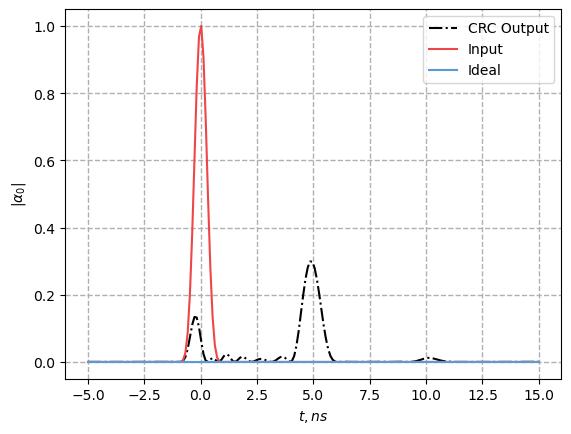

In [2]:
import matplotlib.pyplot as plt
# Plot the output field

blue_1   = (91/255, 155/255, 213/255);
red_1    = (237/255, 70/255, 70/255);
green_1  = (0/255, 176/255, 80/255);
black_1  = (0, 0, 0);
unknown_1   = (150/255, 15/255, 213/255);
unknown_2    = (150/255, 150/255, 150/255);
blue_2   = (91/255, 100/255, 255/255);
red_2    = (150/255, 70/255, 70/255);
green_2  = (0/255, 250/255, 80/255);


fig, ax = plt.subplots()  # Create a figure and an axes. figsize=(16, 9)

plt.grid(linestyle='--', linewidth=2)
ax.plot(time, np.abs(Atout)**2/norm, color=black_1,linestyle='-.', label='CRC Output')
ax.plot(time, np.abs(Atin)**2/norm, color=red_1,linestyle='-', label='Input')
ax.plot(time, np.abs(IM)**2/norm, color=blue_1,linestyle='-', label='Ideal')

plt.grid(linestyle='--', linewidth=1)
plt.xlabel('$t, ns$')
plt.ylabel('$|\\alpha_0|$')
plt.legend()

print("The efficiency:",spectrum_eff(recall_time, omega, domega, kappas,gammas,Deltas))